# EDA

#### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [2]:
!pip install missingno

#### Load the data

In [4]:
df = pd.read_csv('../popular_songs_metadata_combined.csv')

#### Looking at the Data

In [5]:
df.shape

(9000, 20)

In [6]:
df.head()

,user,song,title,play_count,release,artist_name,year,genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,a4f803a42f03018ccfa4c8a27e330df40be8b9b9,SOPSOHT12A67AE0235,Almaz,1,Every Kind Of Mood,Randy Crawford,1986,"disco, smooth jazz",0.694,0.637,2.0,-7.555,0.0,0.0321,0.636000,0.004130,0.1290,0.397,136.007,2fbTbfyhKAb3sKySsTeOy9
1,0878045f0dc2968f0403a26e6fd8bda99d19d0db,SOXIGHW12A6D4F7245,Weak In The Knees,2,If Your Memory Serves You Well,Serena Ryder,2006,"canadian indie, canadian pop, canadian singer-...",0.613,0.710,5.0,-4.689,1.0,0.0304,0.295000,0.000005,0.1200,0.401,141.987,1xebBdGOBa4vg3a4PvPiar
2,2bd8c53931b30461ecf79469c12099a5e25f6618,SOAZTAD12A8C14494A,Until We're Dead,1,Until We're Dead,Star Fucking Hipsters,2008,"crack rock steady, folk punk, ska, ska punk",0.251,0.933,1.0,-6.382,1.0,0.1160,0.000026,0.220000,0.0849,0.140,114.711,4lfZ5fgY8XALDoKBwErce0
3,1adcd0137fabfe2c9b2828caf5b1c95bf7994337,SODTEIO12A8AE46F47,Gas Can Row,1,Head Home,O'Death,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e8a55ac62f27b90294c126358ef5409b6a341fcd,SOWSEEJ12AB01893F4,Everything Looks Beautiful On Video,5,Stop The Future,The Epoxies,2005,"portland punk, power-pop punk",0.444,0.894,7.0,-3.569,1.0,0.0406,0.002210,0.001850,0.4050,0.637,175.938,5oMMBaq00zNkDXV3zuTO6G


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user              9000 non-null   object 
 1   song              9000 non-null   object 
 2   title             9000 non-null   object 
 3   play_count        9000 non-null   int64  
 4   release           9000 non-null   object 
 5   artist_name       9000 non-null   object 
 6   year              9000 non-null   int64  
 7   genres            6753 non-null   object 
 8   danceability      6965 non-null   float64
 9   energy            6965 non-null   float64
 10  key               6965 non-null   float64
 11  loudness          6965 non-null   float64
 12  mode              6965 non-null   float64
 13  speechiness       6965 non-null   float64
 14  acousticness      6965 non-null   float64
 15  instrumentalness  6965 non-null   float64
 16  liveness          6965 non-null   float64


In [8]:
df.isnull().sum()

user                   0
song                   0
title                  0
play_count             0
release                0
artist_name            0
year                   0
genres              2247
danceability        2035
energy              2035
key                 2035
loudness            2035
mode                2035
speechiness         2035
acousticness        2035
instrumentalness    2035
liveness            2035
valence             2035
tempo               2035
id                  2035
dtype: int64

In [9]:
df.drop(columns=['genres', 'id'], inplace=True, axis=1)

In [10]:
df.isnull().sum()/df.shape[0]

user                0.000000
song                0.000000
title               0.000000
play_count          0.000000
release             0.000000
artist_name         0.000000
year                0.000000
danceability        0.226111
energy              0.226111
key                 0.226111
loudness            0.226111
mode                0.226111
speechiness         0.226111
acousticness        0.226111
instrumentalness    0.226111
liveness            0.226111
valence             0.226111
tempo               0.226111
dtype: float64

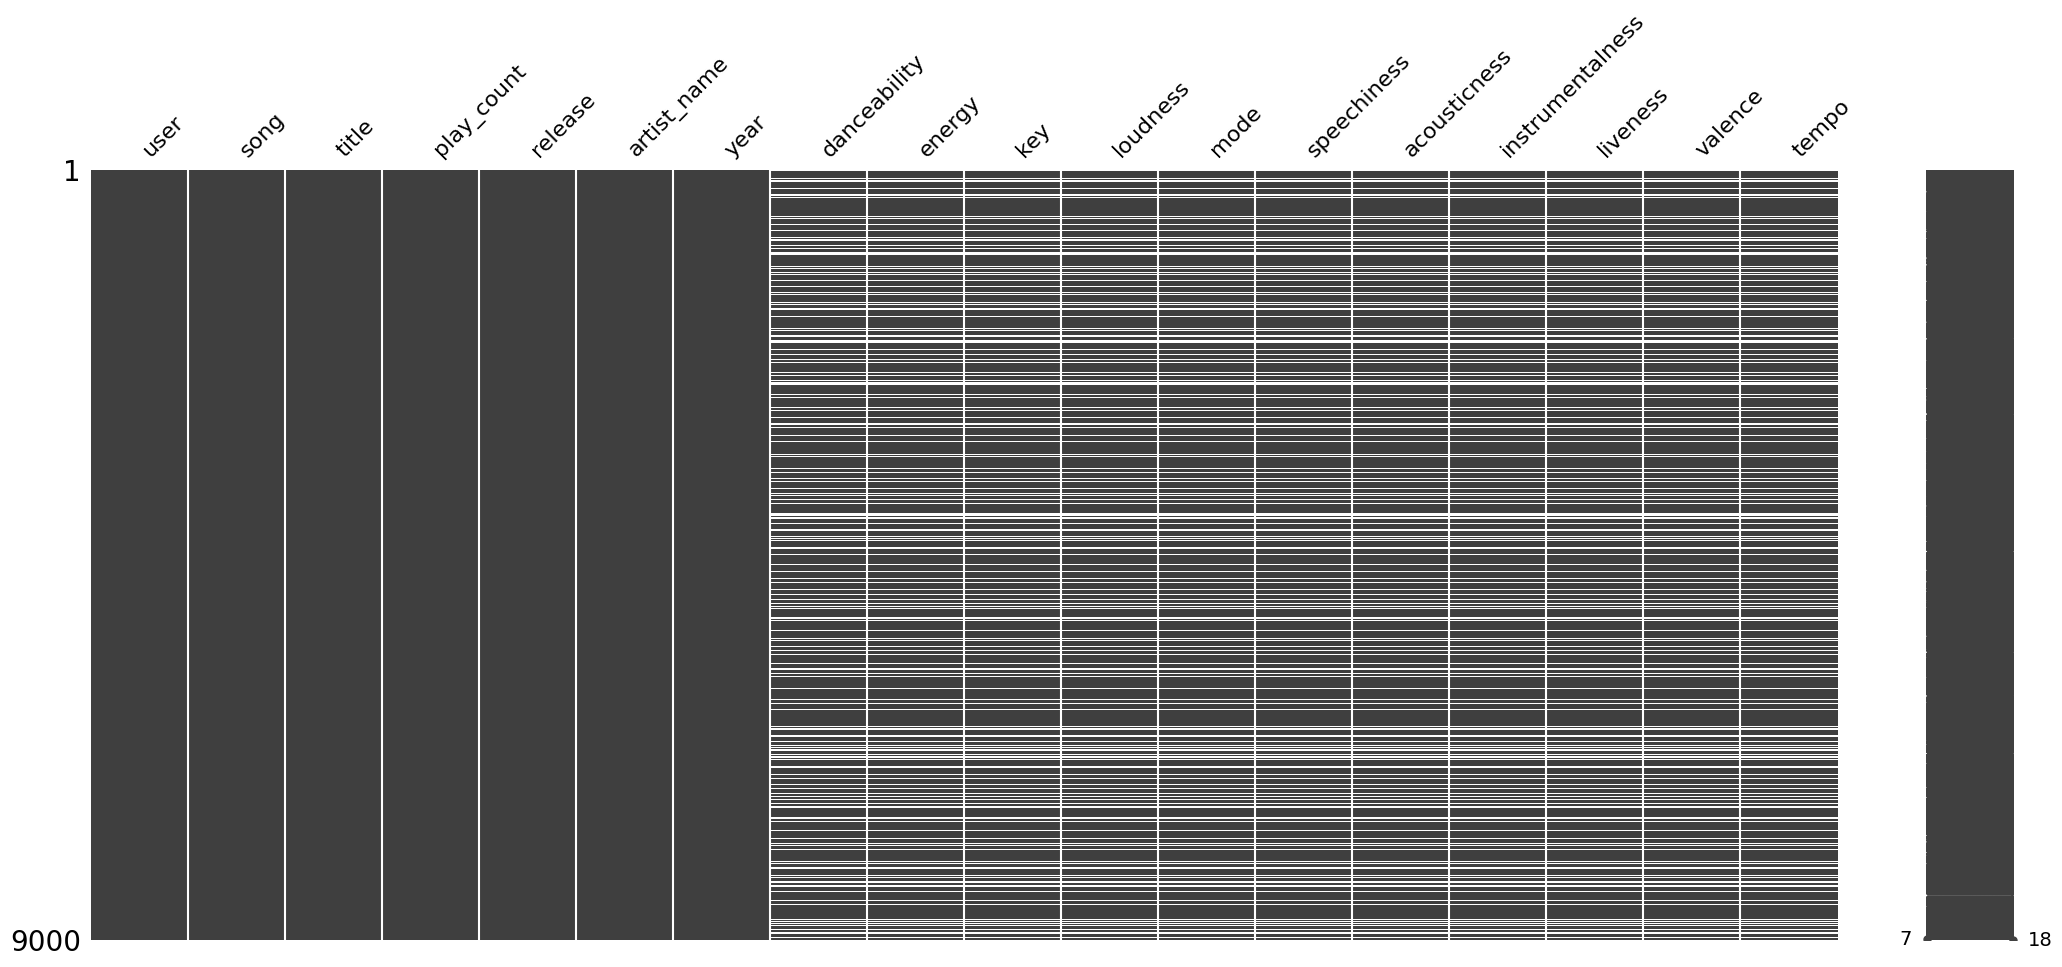

In [11]:
msno.matrix(df)
plt.show()

### Handling missing values by imputing them with a RandomForestRegressor

In [12]:
columns_to_impute = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 
    'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo']

data_for_imputation = df[columns_to_impute]

imputer = IterativeImputer(estimator=RandomForestRegressor(), missing_values=np.nan, max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(data_for_imputation)
df[columns_to_impute] = imputed_data

/opt/homebrew/lib/python3.11/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [14]:
df.isnull().sum()/df.shape[0]

user                0.0
song                0.0
title               0.0
play_count          0.0
release             0.0
artist_name         0.0
year                0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
dtype: float64

# Starting the exploration

In [15]:
df.head()

,user,song,title,play_count,release,artist_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,a4f803a42f03018ccfa4c8a27e330df40be8b9b9,SOPSOHT12A67AE0235,Almaz,1,Every Kind Of Mood,Randy Crawford,1986,0.6940,0.63700,2.00,-7.55500,0.00,0.03210,0.636000,0.004130,0.1290,0.397000,136.00700
1,0878045f0dc2968f0403a26e6fd8bda99d19d0db,SOXIGHW12A6D4F7245,Weak In The Knees,2,If Your Memory Serves You Well,Serena Ryder,2006,0.6130,0.71000,5.00,-4.68900,1.00,0.03040,0.295000,0.000005,0.1200,0.401000,141.98700
2,2bd8c53931b30461ecf79469c12099a5e25f6618,SOAZTAD12A8C14494A,Until We're Dead,1,Until We're Dead,Star Fucking Hipsters,2008,0.2510,0.93300,1.00,-6.38200,1.00,0.11600,0.000026,0.220000,0.0849,0.140000,114.71100
3,1adcd0137fabfe2c9b2828caf5b1c95bf7994337,SODTEIO12A8AE46F47,Gas Can Row,1,Head Home,O'Death,2007,0.5911,0.59639,4.98,-9.39585,0.68,0.04983,0.280321,0.033986,0.1584,0.481678,113.94527
4,e8a55ac62f27b90294c126358ef5409b6a341fcd,SOWSEEJ12AB01893F4,Everything Looks Beautiful On Video,5,Stop The Future,The Epoxies,2005,0.4440,0.89400,7.00,-3.56900,1.00,0.04060,0.002210,0.001850,0.4050,0.637000,175.93800


In [16]:
df.dtypes

user                 object
song                 object
title                object
play_count            int64
release              object
artist_name          object
year                  int64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

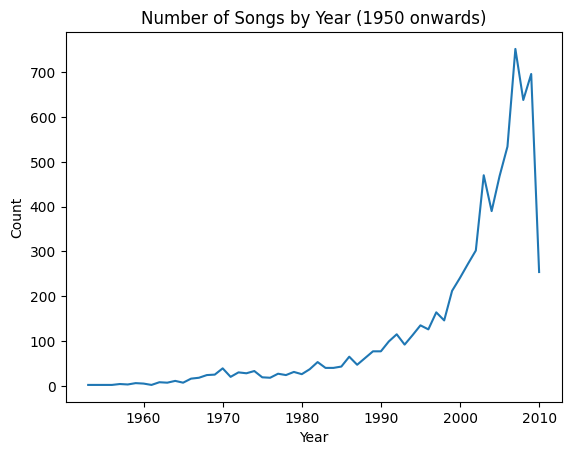

In [17]:
df.groupby('year')['song'].count().loc[1900:].plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Songs by Year (1950 onwards)')
plt.show()


When plotting this initially I can see that there are some songs that have weird realease years. I am going to explot this to understand why this is happening. By using .describe() for this column, we can also see that the min value is 0, which is logically incorrect. 

In [18]:
df['year'].describe()

count    9000.000000
mean     1599.704222
std       800.778844
min         0.000000
25%      1981.000000
50%      2002.000000
75%      2007.000000
max      2010.000000
Name: year, dtype: float64

In [19]:
df[df['year'] == 0]['song'].count()
columns_to_impute = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 
    'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'year']

data_for_imputation = df[columns_to_impute]

imputer = IterativeImputer(estimator=RandomForestRegressor(), missing_values=np.nan, max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(data_for_imputation)
df[columns_to_impute] = imputed_data


In [20]:
df['year'].describe()

count    9000.000000
mean     1599.704222
std       800.778844
min         0.000000
25%      1981.000000
50%      2002.000000
75%      2007.000000
max      2010.000000
Name: year, dtype: float64

In [21]:
#key, year and mode are categorical variables
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df['year'] = df['year'].astype('category')
df['play_count'] = df['play_count'].astype('int64')

In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming df is your DataFrame

# Initialize MinMaxScaler (or another scaler of your choice)
# Example: Scale between 0 and 1
scaler = MinMaxScaler()

# Select numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Iterate over the numerical columns to apply transformations
for column in numeric_columns:
    if column != 'play_count':
        if df[column].min() > 0:
            # Apply log transformation for strictly positive columns
            df[column] = np.log1p(df[column])
        else:
            # For columns with negative values, apply scaling
            # Reshape data for scaler
            scaled_data = df[column].values.reshape(-1, 1)
            df[column] = scaler.fit_transform(scaled_data).flatten()

# Note: The transformation for 'loudness' or any column with negative values is done through scaling here
# Adjust this approach based on your analysis needs and the specific characteristics of your data


In [23]:
df.head()

,user,song,title,play_count,release,artist_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,a4f803a42f03018ccfa4c8a27e330df40be8b9b9,SOPSOHT12A67AE0235,Almaz,1,Every Kind Of Mood,Randy Crawford,1986.0,0.527093,0.492865,2.00,0.777611,0.00,0.031596,0.492254,0.004184,0.121332,0.402229,4.920032
1,0878045f0dc2968f0403a26e6fd8bda99d19d0db,SOXIGHW12A6D4F7245,Weak In The Knees,2,If Your Memory Serves You Well,Serena Ryder,2006.0,0.478096,0.536493,5.00,0.840104,1.00,0.029947,0.258511,0.000005,0.113329,0.406282,4.962754
2,2bd8c53931b30461ecf79469c12099a5e25f6618,SOAZTAD12A8C14494A,Until We're Dead,1,Until We're Dead,Star Fucking Hipsters,2008.0,0.223943,0.659073,1.00,0.803188,1.00,0.109751,0.000026,0.222898,0.081488,0.141844,4.751096
3,1adcd0137fabfe2c9b2828caf5b1c95bf7994337,SODTEIO12A8AE46F47,Gas Can Row,1,Head Home,O'Death,2007.0,0.464426,0.467745,4.98,0.737471,0.68,0.048628,0.247111,0.034433,0.147040,0.488022,4.744456
4,e8a55ac62f27b90294c126358ef5409b6a341fcd,SOWSEEJ12AB01893F4,Everything Looks Beautiful On Video,5,Stop The Future,The Epoxies,2005.0,0.367417,0.638691,7.00,0.864525,1.00,0.039797,0.002208,0.001874,0.340037,0.645390,5.175799


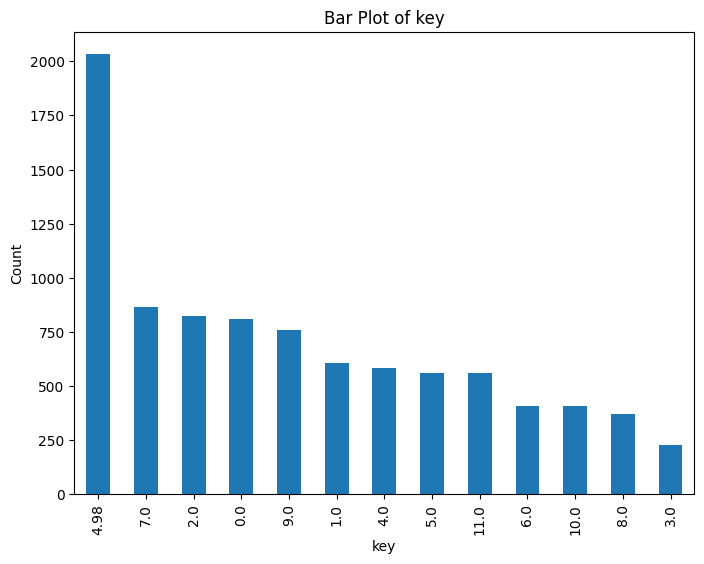

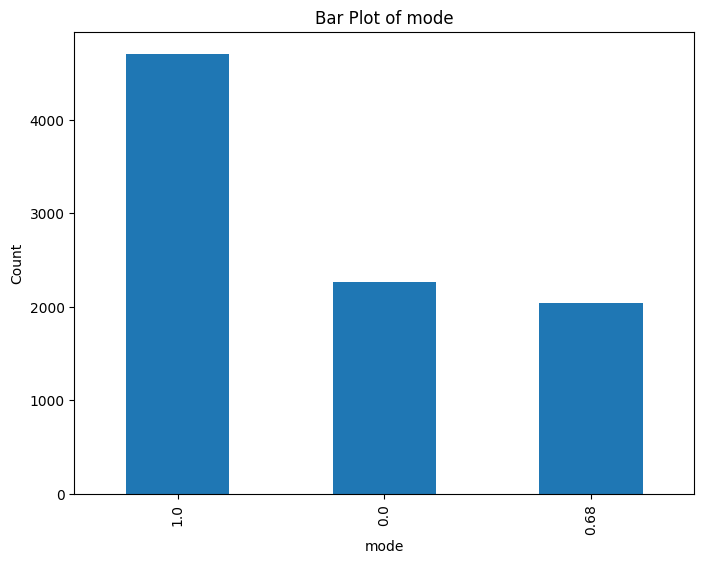

In [24]:
categorical_columns = df.select_dtypes(include=['category']).columns

for column in categorical_columns:
    if column != 'year':
        plt.figure(figsize=(8, 6))
        df[column].value_counts().plot(kind='bar')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Bar Plot of {column}')
        plt.show()


<Axes: xlabel='title'>

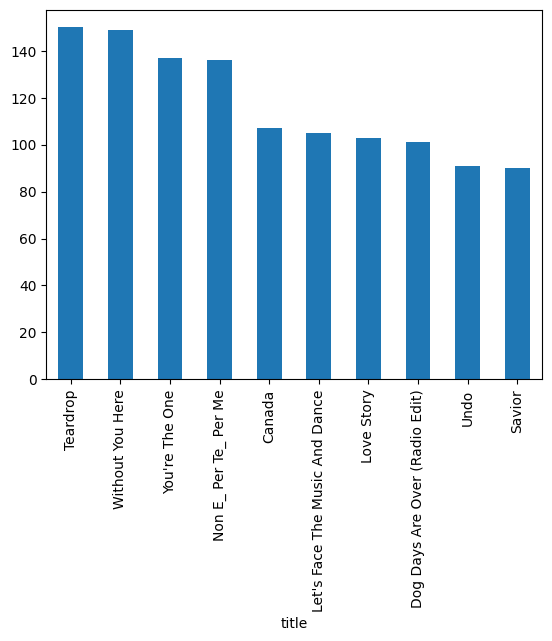

In [25]:
df.groupby('title')['play_count'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: >

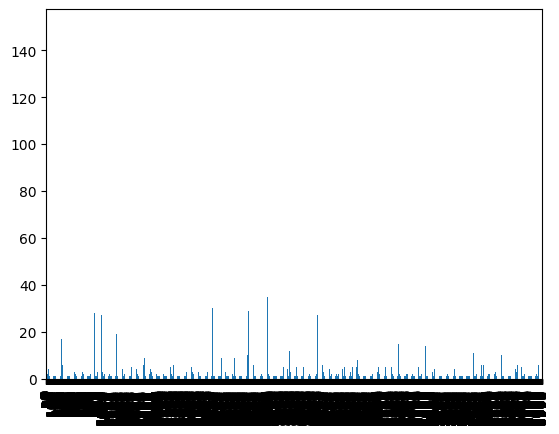

In [48]:
df["play_count"].plot(kind="bar")

In [26]:
df.groupby('user')['play_count'].sum().mean()

2.9995403355550447

## Encoding

In [27]:
df.dtypes

user                  object
song                  object
title                 object
play_count             int64
release               object
artist_name           object
year                category
danceability         float64
energy               float64
key                 category
loudness             float64
mode                category
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Your DataFrame is named df

# Select columns that are of type object or category
columns_to_encode = df.select_dtypes(include=['object', 'category']).columns

# Initialize a LabelEncoder
le = LabelEncoder()

# Loop through each column to apply LabelEncoder
for column in columns_to_encode:
    if df[column].dtype == 'category':
        # Add 'Missing' to categories if it's not already there
        if 'Missing' not in df[column].cat.categories:
            df[column] = df[column].cat.add_categories(['Missing'])
    # Now safely fill missing values with 'Missing'
    df[column] = df[column].fillna('Missing')
    # Apply Label Encoding
    df[column] = le.fit_transform(df[column])


In [30]:
df.to_csv('../dataset_ready.csv')